In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/home/hanwenli/work/2025/AL_SSL/results_with_num_unlabeled_llama3.csv')
trivia_qa_df = dataset[dataset['dataset'] == 'trivia_qa']
trivia_qa_df

,model,uncertainty_type,dataset,unlabeled_size,auroc
0,llama3,sar,trivia_qa,100,0.762533
1,llama3,sar,trivia_qa,200,0.764794
2,llama3,sar,trivia_qa,300,0.796340
3,llama3,sar,trivia_qa,400,0.807010
4,llama3,sar,trivia_qa,500,0.813994
...,...,...,...,...,...
306,llama3,montecarlosequenceentropy,trivia_qa,2700,0.853806
307,llama3,montecarlosequenceentropy,trivia_qa,2800,0.846652
308,llama3,montecarlosequenceentropy,trivia_qa,2900,0.845920
309,llama3,montecarlosequenceentropy,trivia_qa,3000,0.853084


In [3]:
data_list = [
    {'name':'SAR','value':trivia_qa_df[trivia_qa_df['uncertainty_type']=='sar']['auroc'].to_list(), 'num_unlabeled':trivia_qa_df[trivia_qa_df['uncertainty_type']=='sar']['unlabeled_size'].to_list()},
    {'name':'SE','value':trivia_qa_df[trivia_qa_df['uncertainty_type']=='semanticentropy']['auroc'].to_list(), 'num_unlabeled':trivia_qa_df[trivia_qa_df['uncertainty_type']=='semanticentropy']['unlabeled_size'].to_list()},
    {'name':'MSP','value':trivia_qa_df[trivia_qa_df['uncertainty_type']=='maximumsequenceprobability']['auroc'].to_list(), 'num_unlabeled':trivia_qa_df[trivia_qa_df['uncertainty_type']=='maximumsequenceprobability']['unlabeled_size'].to_list()},
    {'name':'LS','value':trivia_qa_df[trivia_qa_df['uncertainty_type']=='lexicalsimilarity']['auroc'].to_list(), 'num_unlabeled':trivia_qa_df[trivia_qa_df['uncertainty_type']=='lexicalsimilarity']['unlabeled_size'].to_list()},
    {'name':'MCSE','value':trivia_qa_df[trivia_qa_df['uncertainty_type']=='montecarlosequenceentropy']['auroc'].to_list(), 'num_unlabeled':trivia_qa_df[trivia_qa_df['uncertainty_type']=='montecarlosequenceentropy']['unlabeled_size'].to_list()}
]
data_list

[{'name': 'SAR',
  'value': [0.762532780966136,
   0.7647941925430429,
   0.796339933867964,
   0.8070103758884117,
   0.8139941469347423,
   0.7824103986925621,
   0.8108585762608794,
   0.8274771008323515,
   0.8211299456501083,
   0.8361331762380754,
   0.815751966857968,
   0.8390644597316711,
   0.8481718672798448,
   0.8403424423245032,
   0.847991334422865,
   0.8523241229903843,
   0.8614077762152712,
   0.8500817148721067,
   0.8507848428413971,
   0.8581439321956595,
   0.8560107939645014,
   0.855421686746988,
   0.8509368705104329,
   0.8499106837444415,
   0.863745201626696,
   0.8516399984797234,
   0.8557732507316331,
   0.8631845995971268,
   0.856029797423131,
   0.854271977499905,
   0.8674508760594428],
  'num_unlabeled': [100,
   200,
   300,
   400,
   500,
   600,
   700,
   800,
   900,
   1000,
   1100,
   1200,
   1300,
   1400,
   1500,
   1600,
   1700,
   1800,
   1900,
   2000,
   2100,
   2200,
   2300,
   2400,
   2500,
   2600,
   2700,
   2800,
   2900,

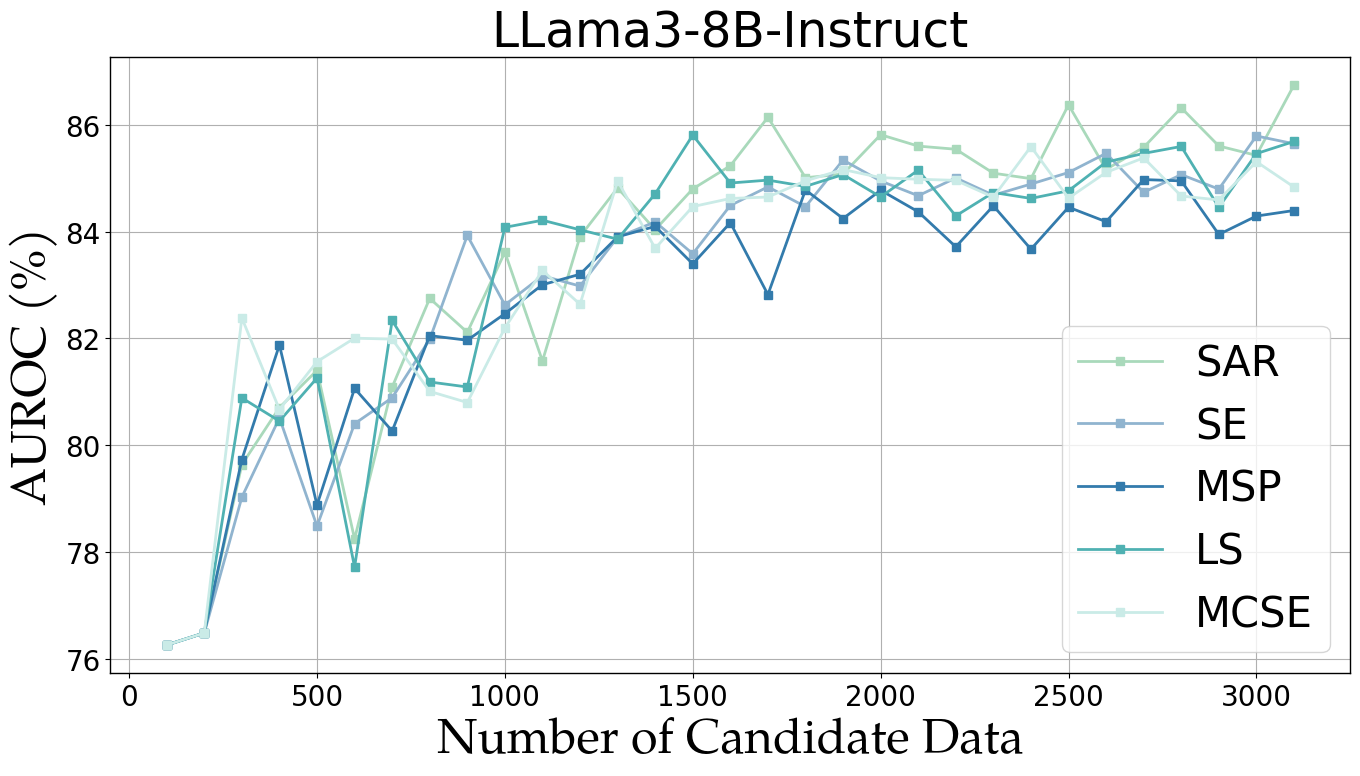

In [4]:
def plot_uncertainty_types(data_list, output_filename='uncertainty_auroc_plot.png'):
    """
    Plot AUROC values for different uncertainty types with unlabeled size as x-axis
    
    Parameters:
    data_list: list of dictionaries with 'name', 'value', and 'num_unlabeled' keys
    output_filename: str, filename to save the plot
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    colors = sns.color_palette('muted', len(data_list))
    colors = ['#CEDCE9','#82A4C8','#4F7BA8','#335372','#CEDCE9']
    colors = ['#A9D9BB','#90B4CF','#337BAC','#4FB1B2', '#CAEBE7']
    # Define colors and markers for each uncertainty type
    style_settings = {
        'SAR': {'color': '#1b263b', 'marker': 'o'},
        'SE': {'color': '#3a6ea5', 'marker': 'o'},
        'MSP': {'color': '#778da9', 'marker': 'o'},
        'LS': {'color': '#C4C4C4', 'marker': 'o'},
        'MCSE': {'color': '#bf0000', 'marker': 'o'}
    }
    
    # Create a figure with sufficient size
    plt.figure(figsize=(16, 8))
    
    # Plot each uncertainty type
    for i, item in enumerate(data_list):
        name = item['name']
        values = [i*100 for i in item['value']]
        num_unlabeled = item['num_unlabeled']
        
        # Get style settings
        style = style_settings.get(name, {'color': 'black', 'marker': 'x'})
        
        # Plot the line
        plt.plot(
            num_unlabeled,
            values,
            label=name,
            color=colors[i],
            linestyle='-',
            linewidth=2,
            marker='s'
        )
    
    # Set the x-axis and y-axis labels
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Number of Candidate Data', fontsize=35, fontfamily='TeX Gyre Pagella')
    plt.ylabel('AUROC (%)', fontsize=35, fontfamily='TeX Gyre Pagella')
    plt.title('LLama3-8B-Instruct', fontsize=35)

    # Add grid for better readability
    plt.grid(True)
    # plt.ylim(68, 77)
    # Add a legend
    plt.legend(fontsize=30, loc='lower right')
    
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)
    
    # Adjust layout to make sure everything fits
    
    # Save the figure
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    
    # Display the chart
    plt.show()

# Example usage with your data
plot_uncertainty_types(data_list, '/home/hanwenli/work/2025/AL_SSL/results/experiments/pdf_results/llama3_unlabeled_num.pdf')